# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_url = btc_url + "?format=json"
btc_response_data = requests.get(btc_url).json()
btc_price = btc_response_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_url = eth_url + "?format=json"
eth_response_data = requests.get(eth_url).json()
eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crypto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57086.40
The current value of your 5.3 ETH is $18897.52


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-16", tz="America/New_York").isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=today,
    end=today,
    limit=1000,
).df

# Preview DataFrame
df_ticker

AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2021-09-16 00:00:00-04:00  115.95  116.11  115.905  116.015  2334883  447.32   

                                                              
                             high     low    close    volume  
time                                                          
2021-09-16 00:00:00-04:00  448.27  444.02  446.535  45819924

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.015
Current SPY closing price: $446.535


In [11]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $23203.00
The current value of your 50 SPY shares is $22326.75


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame({'amount':[crypto_value, shares_value]}, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,75983.921
shares,45529.750


array([<AxesSubplot:ylabel='amount'>], dtype=object)

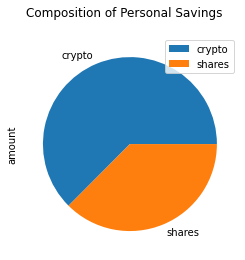

In [13]:
# Plot savings pie chart
df_savings.plot.pie(title="Composition of Personal Savings",subplots=True)

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching this financial goal!")
else:
    print(f"You are ${emergency_fund - total_savings} away from reaching your emergency fund goal!")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-16', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-09-26 00:00:00-04:00  109.95  110.02  109.88  109.990  2074080.0     NaN   
2017-09-27 00:00:00-04:00  109.67  109.75  109.60  109.668  1439682.0  249.88   
2017-09-28 00:00:00-04:00  109.58  109.72  109.51  109.680  1553324.0  249.73   
2017-09-29 00:00:00-04:00  109.74  109.77  109.54  109.640  2969204.0  250.34   
2017-10-02 00:00:00-04:00  109.43  109.47  109.33  109.425  3840216.0  251.49   

                                                                 
                             high       low   close      volume  
time                                                             
2017-09-26 00:00:00-04:00     NaN       NaN     NaN         NaN  
2017-09-27 00:00:00-04:00  250.49  248.8700  250.02  51473231.0  
2017-09-28 00:00:00-04:00  250.44  249.6300  250.34  25577234.0  
2017-09-29 00:00:00-04:00  251.32  250.1300  251.20  41410208.0  
2017-10-02 00:00:00-04:00  252.30  251.2926  252.29  37469184.0

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_simulation = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_simulation.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-09-26 00:00:00-04:00  109.95  110.02  109.88  109.990  2074080.0   
2017-09-27 00:00:00-04:00  109.67  109.75  109.60  109.668  1439682.0   
2017-09-28 00:00:00-04:00  109.58  109.72  109.51  109.680  1553324.0   
2017-09-29 00:00:00-04:00  109.74  109.77  109.54  109.640  2969204.0   
2017-10-02 00:00:00-04:00  109.43  109.47  109.33  109.425  3840216.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2017-09-26 00:00:00-04:00          NaN     NaN     NaN       NaN     NaN   
2017-09-27 00:00:00-04:00    -0.002928  249.88  250.49  248.8700  250.02   
2017-09-28 00:00:00-04:00     0.000109  249.73  250.44  249.6300  250.34   
2017-09-29 00:00:00-04:00    -0.000365  250.34  251.32  250.1300  251.20   
2017-10-02 00:00:00-04:00    -0.001961  251.49  252.30  251.2926  252.29   

                                                    
                               volume daily_return  
time                                                
2017-09-26 00:00:00-04:00         NaN          NaN  
2017-09-27 00:00:00-04:00  51473231.0          NaN  
2017-09-28 00:00:00-04:00  25577234.0     0.001280  
2017-09-29 00:00:00-04:00  41410208.0     0.003435  
2017-10-02 00:00:00-04:00  37469184.0     0.004339

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ijmel\GitHub\Unit-5-Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000438,0.986377,0.999952,0.996856,0.988884,1.003035,0.994280,0.991695,1.001173,0.996784,...,0.980615,1.001135,0.995105,0.991342,0.998929,0.991182,0.999465,0.979272,1.014198,0.986986
2,0.988657,0.975428,1.003240,0.990853,0.996712,1.008345,0.987673,0.990713,1.011124,1.007388,...,0.986136,0.998012,0.995726,0.998154,1.001047,0.990778,0.984490,0.971355,1.002931,0.980776
3,0.984683,0.989139,0.997452,0.999467,0.992552,1.001669,0.985931,0.989832,1.031112,1.016620,...,0.979771,1.001949,0.998306,1.000637,1.011481,0.995570,0.987285,0.984558,1.011086,0.987858
4,0.980722,0.989099,0.997522,1.003948,0.989963,0.999938,0.973261,0.986164,1.028548,1.014590,...,0.987101,1.003660,0.994828,1.010582,1.005742,0.993618,0.996034,0.978487,1.016368,0.989650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.241137,24.275828,6.926398,13.061060,32.359112,23.187509,28.894399,4.588645,10.284297,8.820637,...,84.849945,17.869412,25.388219,30.269226,31.265032,27.551359,8.294445,17.627366,2.306768,13.363650
7557,9.173589,24.229384,6.887102,13.134027,32.634089,22.955283,28.818457,4.598684,10.306021,8.808413,...,85.036259,17.812134,25.307154,30.183866,31.139362,27.850118,8.380890,17.546613,2.299970,13.432647
7558,9.175484,24.141460,6.875790,13.128198,32.741369,23.091842,28.642711,4.635732,10.359888,8.922011,...,85.875793,17.804205,25.502857,30.184495,31.356019,27.642555,8.502007,17.586073,2.333823,13.254316
7559,9.191550,24.093268,6.938492,13.119879,32.958013,22.851237,28.752466,4.633252,10.345160,8.890801,...,85.484225,17.823302,25.404104,30.544425,31.193189,27.851329,8.523503,17.445509,2.347669,13.233692


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

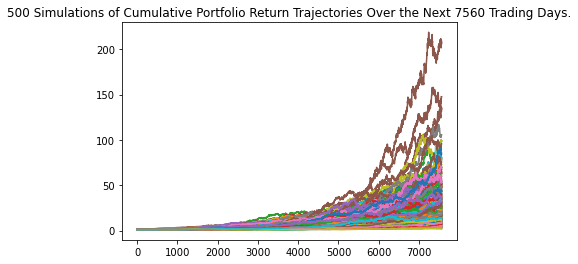

In [23]:
# Plot simulation outcomes
MC_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

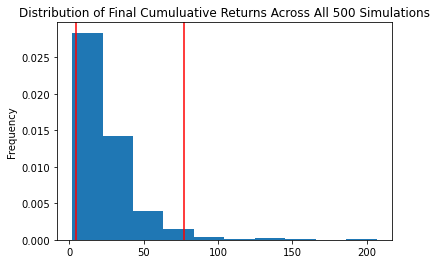

In [24]:
# Plot probability distribution and confidence intervals
MC_simulation.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_simulation.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             24.641991
std              20.603705
min               1.945969
25%              12.030652
50%              19.471725
75%              30.992456
max             206.584320
95% CI Lower      4.682795
95% CI Upper     76.815511
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93655.9 and $1536310.21


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $140483.85 and $2304465.32


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_simulation = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.25,.75],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ijmel\GitHub\Unit-5-Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993297,1.009693,1.010529,0.991979,0.993420,1.003982,0.989636,0.994469,1.001952,1.012956,...,1.001385,0.992306,1.009785,1.011668,1.032755,1.006046,1.007298,0.998364,0.991095,0.997065
2,0.989039,1.016583,1.015084,0.990781,0.980320,0.992130,0.995273,0.994155,0.997846,1.010880,...,1.002706,0.979428,1.018375,1.020891,1.032561,1.002362,1.015674,1.003270,0.994981,0.993549
3,0.993683,1.009539,1.031018,0.982632,0.998059,1.015528,0.992751,0.970086,1.000382,1.013113,...,1.002822,0.970378,1.015462,1.015525,1.037003,1.006568,0.995201,0.990750,0.977628,0.989059
4,1.011466,1.011146,1.034505,0.998100,0.993223,0.999104,0.988735,0.968855,1.015516,1.014570,...,1.019711,0.960433,1.004646,1.017925,1.041297,1.018299,0.980754,0.982830,0.994624,1.007718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.346815,1.289984,0.964411,1.405748,2.187124,1.311473,2.209468,2.472014,2.940964,1.855845,...,2.945421,2.005223,1.481356,1.575204,1.290693,1.616504,2.244988,1.144330,1.378745,1.471019
1257,1.367431,1.292734,0.948270,1.384942,2.197249,1.316317,2.237710,2.472080,2.920856,1.827599,...,2.934033,1.969052,1.489171,1.575222,1.277915,1.624903,2.266822,1.130463,1.385787,1.471832
1258,1.358985,1.270924,0.944258,1.389635,2.236543,1.329890,2.250116,2.446306,2.910585,1.868020,...,2.942120,1.944532,1.476183,1.597766,1.283029,1.638549,2.231787,1.105935,1.401071,1.460031
1259,1.349953,1.255733,0.936388,1.410389,2.237675,1.346474,2.243420,2.450129,2.896969,1.858516,...,2.909990,1.959452,1.487731,1.605342,1.280555,1.637330,2.206846,1.096083,1.416102,1.466500


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

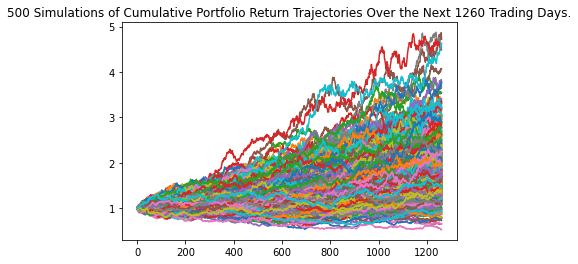

In [30]:
# Plot simulation outcomes
MC_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

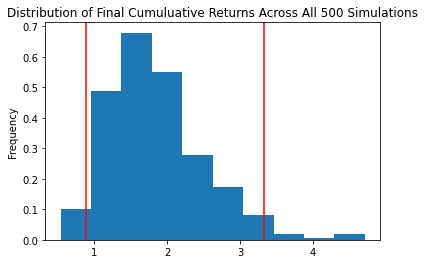

In [31]:
# Plot probability distribution and confidence intervals
MC_simulation.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_simulation.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.851144
std               0.655678
min               0.532860
25%               1.376797
50%               1.747167
75%               2.187612
max               4.717143
95% CI Lower      0.887361
95% CI Upper      3.324505
Name: 1260, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53241.63 and $199470.32


### Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_simulation = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.25,.75],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ijmel\GitHub\Unit-5-Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005385,0.990145,0.999818,1.004845,1.010787,1.006179,0.987052,1.018788,1.019255,1.005555,...,0.999338,1.002143,1.008451,1.009700,0.999651,0.989554,0.994919,0.977321,0.987175,1.003167
2,0.994897,1.000991,0.998284,0.999867,1.011643,1.014561,0.981004,1.037404,1.006985,1.010731,...,0.996225,1.001536,1.013386,0.988429,0.982988,1.002804,0.997335,0.975952,0.982160,1.002305
3,0.985932,1.000869,1.003201,0.996684,0.999736,1.026107,0.993366,1.035488,1.012684,1.018066,...,1.001632,0.997768,0.994443,0.997492,0.984252,1.010450,1.020566,0.970427,0.986192,0.999641
4,0.992852,1.002403,1.001115,1.004647,0.998643,1.017800,0.996314,1.053125,1.001841,1.020864,...,0.997762,1.015321,1.005965,1.008373,1.003654,0.997676,1.009805,0.967573,0.979110,1.006762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.857998,2.532199,2.549466,1.729945,4.410400,4.295353,1.630917,2.371588,3.947142,3.711244,...,1.854196,2.539332,5.069617,2.223409,6.947663,3.836939,2.162113,2.014387,3.314849,2.009453
2517,3.896013,2.523268,2.592747,1.706637,4.399356,4.298695,1.665825,2.399759,3.996841,3.709225,...,1.856784,2.510569,5.072550,2.207906,6.981290,3.840162,2.161275,1.977625,3.342298,2.048579
2518,3.890990,2.524980,2.626932,1.723468,4.422045,4.269708,1.691400,2.348635,3.990195,3.677175,...,1.843210,2.471416,5.010680,2.186512,6.985363,3.814898,2.151181,1.989321,3.230702,2.054741
2519,3.833018,2.532375,2.623261,1.702412,4.410950,4.266793,1.680305,2.359005,3.983780,3.662872,...,1.846318,2.486684,5.060456,2.165178,6.806134,3.872798,2.123214,1.997843,3.223928,2.049664


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

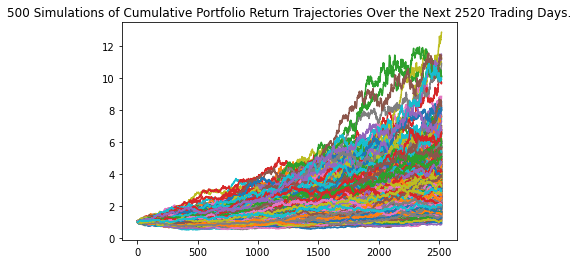

In [38]:
# Plot simulation outcomes
MC_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

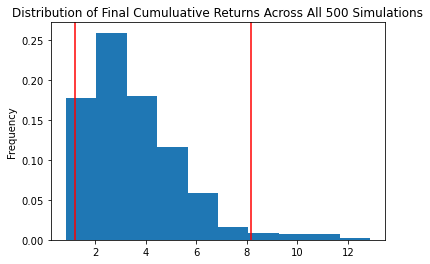

In [39]:
# Plot probability distribution and confidence intervals
MC_simulation.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_simulation.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.545194
std               1.862173
min               0.847491
25%               2.164089
50%               3.131640
75%               4.495067
max              12.875496
95% CI Lower      1.201912
95% CI Upper      8.147460
Name: 2520, dtype: float64


In [42]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $72114.74 and $488847.61
